In [1]:
import pandas as pd 
import seaborn as sns
from imblearn.over_sampling import SMOTE as smt



# Reading Data

In [68]:
data_ = pd.read_csv('/Users/vishal/Desktop/Way to New World/University/01_All_Semesters/01_Semester/03_Projects/01_DS/6101_Project_Data_Diggers/Datasets/Asteroid_Hazard_Classification.csv')
data_smote = pd.read_csv('/Users/vishal/Desktop/Way to New World/University/01_All_Semesters/01_Semester/03_Projects/01_DS/6101_Project_Data_Diggers/Datasets/Asteroid_Hazard_Classification.csv')
data_.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,417.388066,933.308089,1/1/95,7.890000e+11,6.115834,...,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,479.225620,1071.581063,1/1/95,7.890000e+11,18.113985,...,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,759.521423,1698.341531,1/8/95,7.900000e+11,7.590711,...,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,28.876199,64.569144,1/15/95,7.900000e+11,11.173875,...,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,417.388066,933.308089,1/15/95,7.900000e+11,9.840831,...,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,True


# Converting the Target Variable to Integer

In [48]:
data_['Hazardous'] = data_['Hazardous'].astype(int)
data_.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,417.388066,933.308089,1/1/95,7.890000e+11,6.115834,...,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,1
1,3723955,3723955,21.3,0.146068,0.326618,479.225620,1071.581063,1/1/95,7.890000e+11,18.113985,...,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,0
2,2446862,2446862,20.3,0.231502,0.517654,759.521423,1698.341531,1/8/95,7.900000e+11,7.590711,...,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,1
3,3092506,3092506,27.4,0.008801,0.019681,28.876199,64.569144,1/15/95,7.900000e+11,11.173875,...,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,0
4,3514799,3514799,21.6,0.127220,0.284472,417.388066,933.308089,1/15/95,7.900000e+11,9.840831,...,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,1


# Function to call the count plot to verify 

In [4]:
def countPlot(Df):
    return sns.countplot(Df, x = 'Hazardous')

# No Sampling Applied


<Axes: xlabel='Hazardous', ylabel='count'>

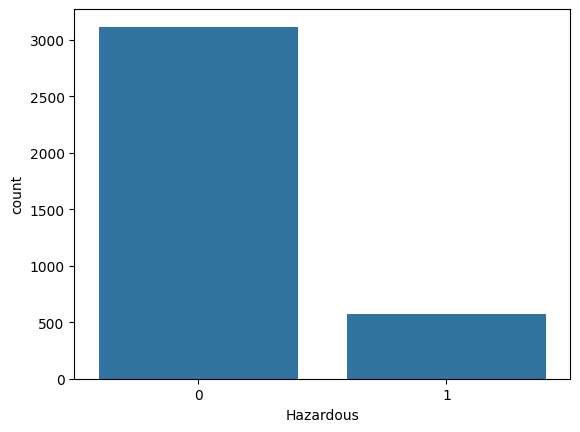

In [5]:
countPlot(data)

# Dropping columns that are not required

In [66]:

data_ = data_.drop('Close Approach Date',axis=1)
data_ = data_.drop('Orbiting Body',axis=1)
data_ = data_.drop('Orbit Determination Date',axis=1)
data_ = data_.drop('Equinox', axis=1)
data_ = data_.drop('Neo Reference ID', axis=1)
data_ = data_.drop('Name', axis=1)
data_ = data_.drop('Epoch Date Close Approach', axis=1)
data_.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3692 entries, 0 to 3691
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            3692 non-null   float64
 1   Est Dia in KM(min)            3692 non-null   float64
 2   Est Dia in KM(max)            3692 non-null   float64
 3   Est Dia in Feet(min)          3692 non-null   float64
 4   Est Dia in Feet(max)          3692 non-null   float64
 5   Relative Velocity km per sec  3692 non-null   float64
 6   Miss Dist.(Astronomical)      3692 non-null   float64
 7   Miss Dist.(lunar)             3692 non-null   float64
 8   Miss Dist.(kilometers)        3692 non-null   float64
 9   Orbit ID                      3692 non-null   int64  
 10  Orbit Uncertainity            3692 non-null   int64  
 11  Minimum Orbit Intersection    3692 non-null   float64
 12  Jupiter Tisserand Invariant   3692 non-null   float64
 13  Epo

In [69]:
data_smote = data_.drop(['Close Approach Date', 'Orbiting Body', 'Orbit Determination Date', 'Equinox', 'Neo Reference ID', 'Name', 'Epoch Date Close Approach'], axis=1)
data_smote.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3692 entries, 0 to 3691
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            3692 non-null   float64
 1   Est Dia in KM(min)            3692 non-null   float64
 2   Est Dia in KM(max)            3692 non-null   float64
 3   Est Dia in Feet(min)          3692 non-null   float64
 4   Est Dia in Feet(max)          3692 non-null   float64
 5   Relative Velocity km per sec  3692 non-null   float64
 6   Miss Dist.(Astronomical)      3692 non-null   float64
 7   Miss Dist.(lunar)             3692 non-null   float64
 8   Miss Dist.(kilometers)        3692 non-null   float64
 9   Orbit ID                      3692 non-null   int64  
 10  Orbit Uncertainity            3692 non-null   int64  
 11  Minimum Orbit Intersection    3692 non-null   float64
 12  Jupiter Tisserand Invariant   3692 non-null   float64
 13  Epo

# Box plot of all the columns

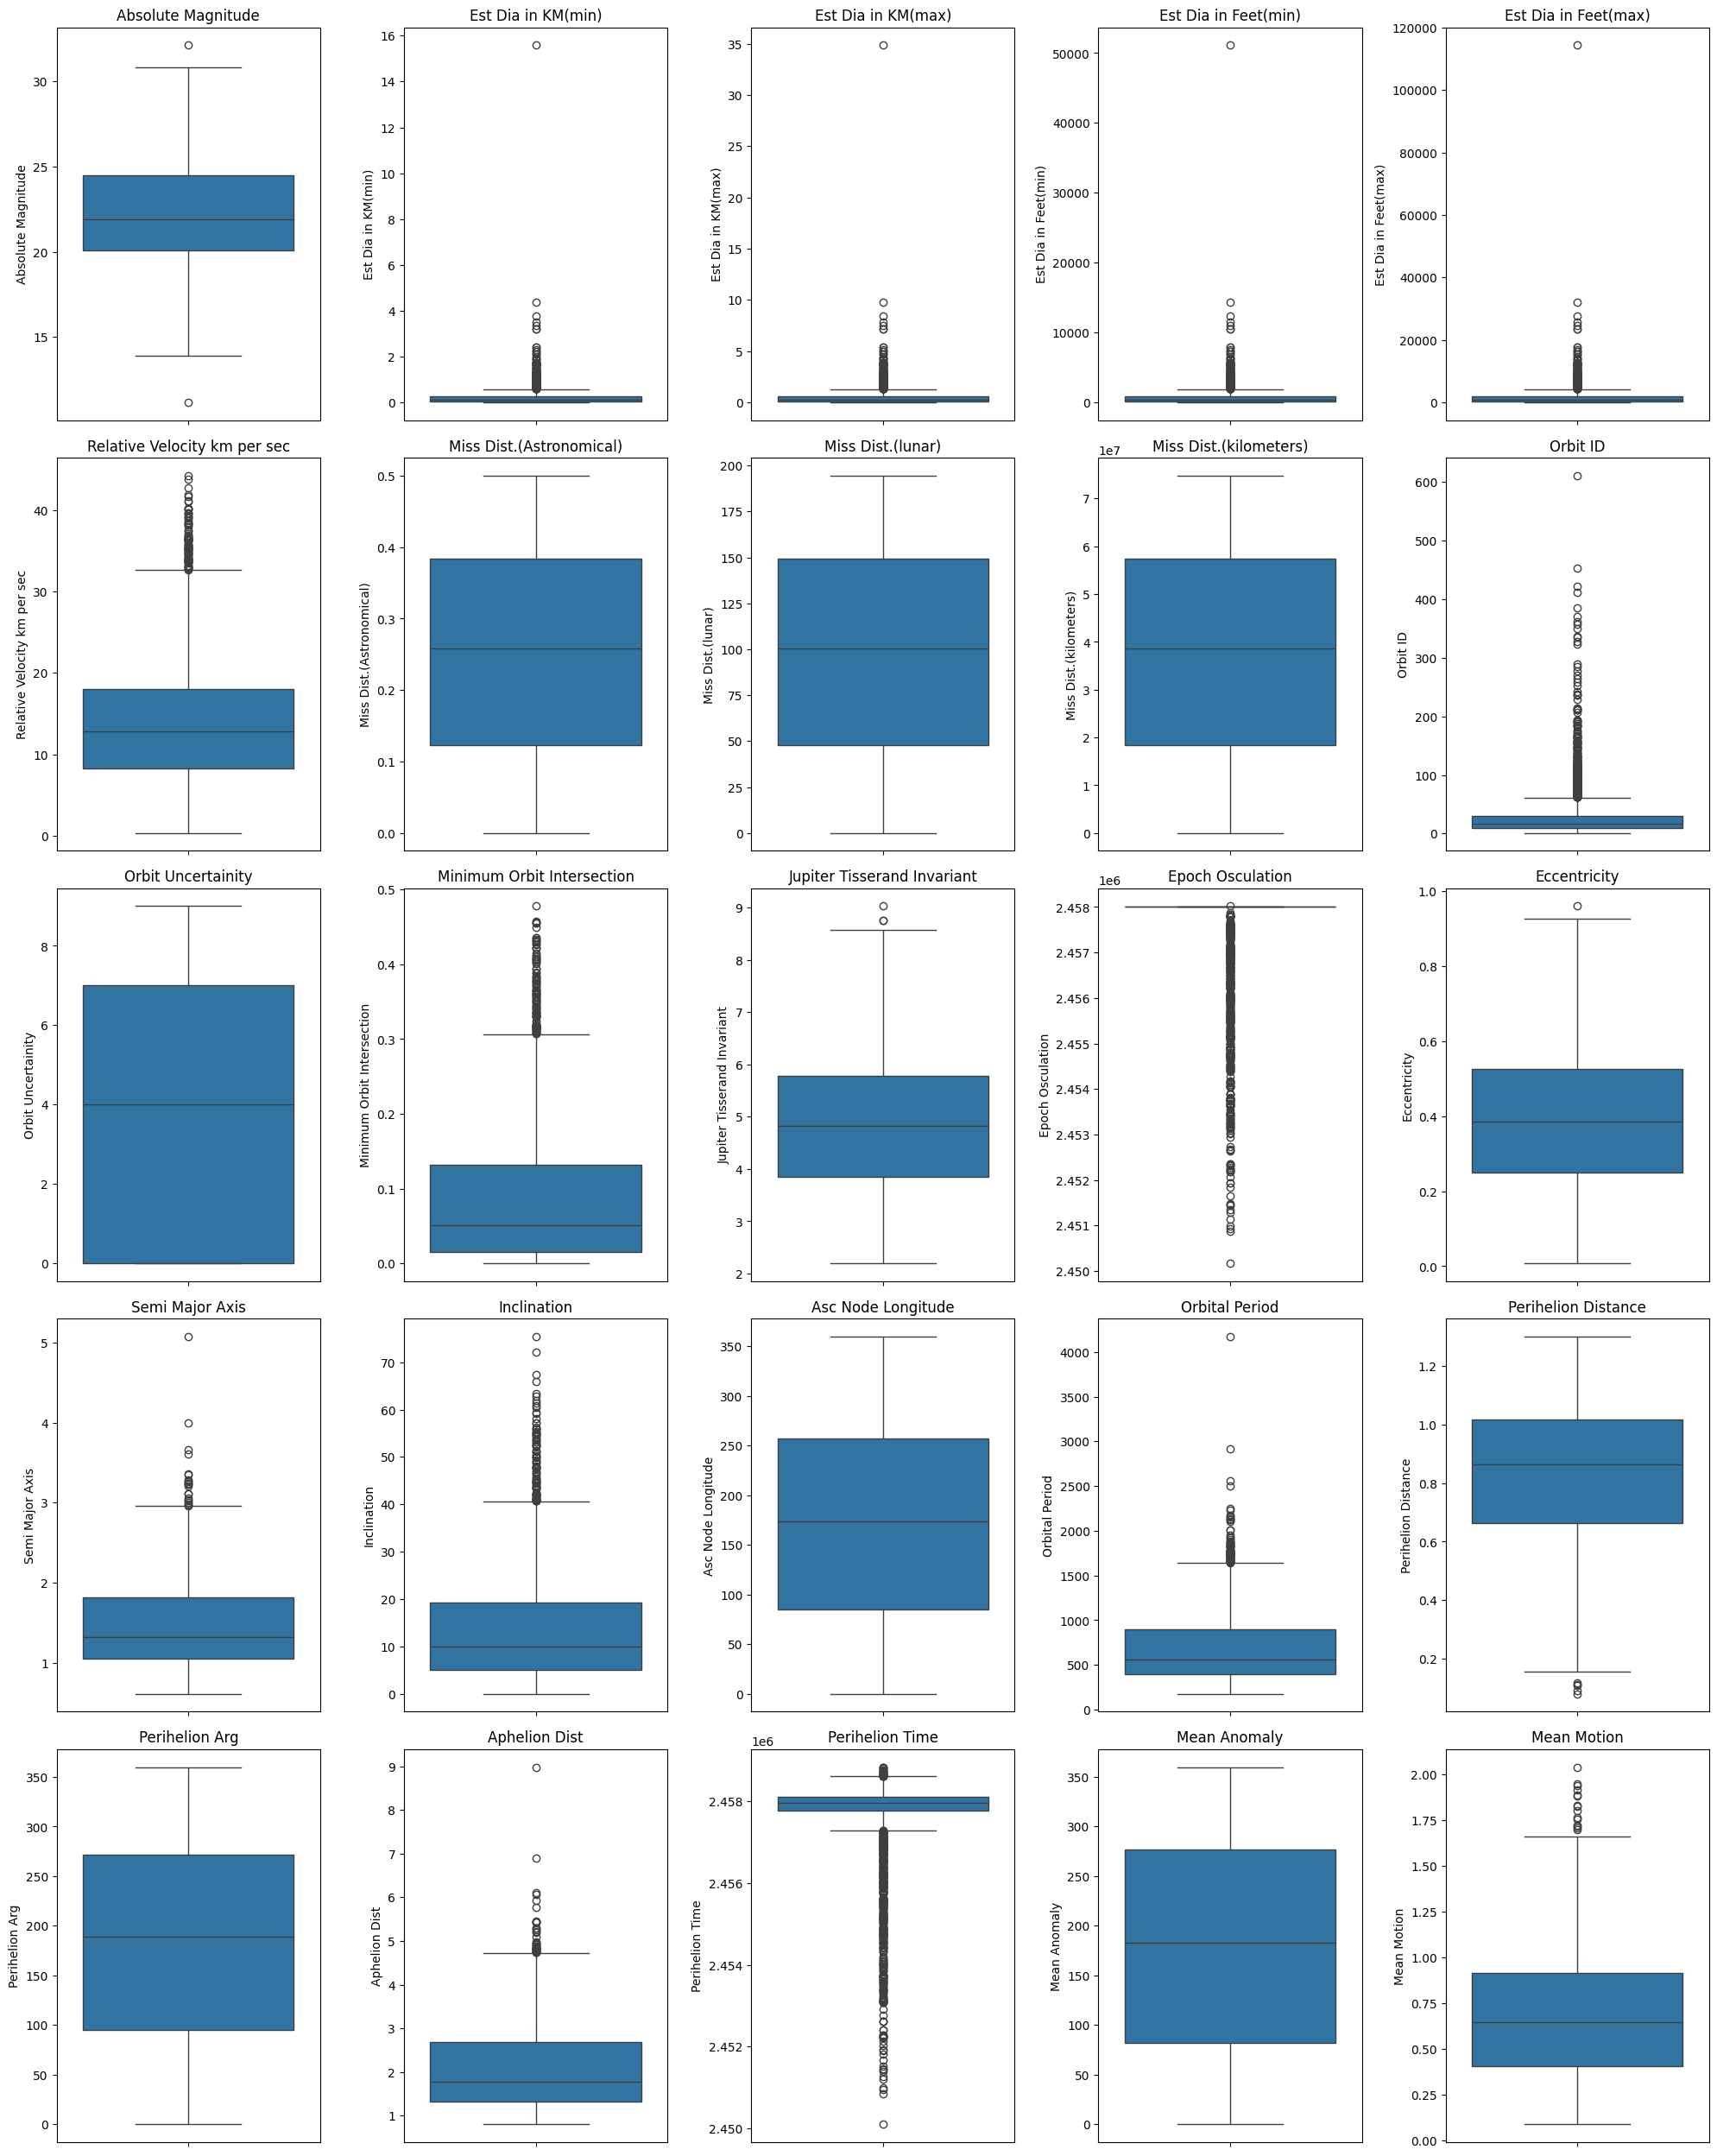

In [19]:
import matplotlib.pyplot as plt
import math

num_variables = len(data.columns)
num_rows = math.ceil(num_variables / 5)  # Assuming 5 columns per row

x = data.drop('Hazardous', axis=1)
# Set the size of the figure
plt.figure(figsize=(20, 5 * num_rows))

# Iterate through each column in the DataFrame
for i, variable in enumerate(x.columns):
    plt.subplot(num_rows, 5, i + 1)
    
    # Use seaborn to create vertical box plots
    sns.boxplot(y=data[variable], whis=1.5, orient='v')
    
    plt.title(variable)
    plt.tight_layout()

# Show the plots
plt.show()

# Outlier Removal without sampling


TypeError: unsupported operand type(s) for -: 'str' and 'str'

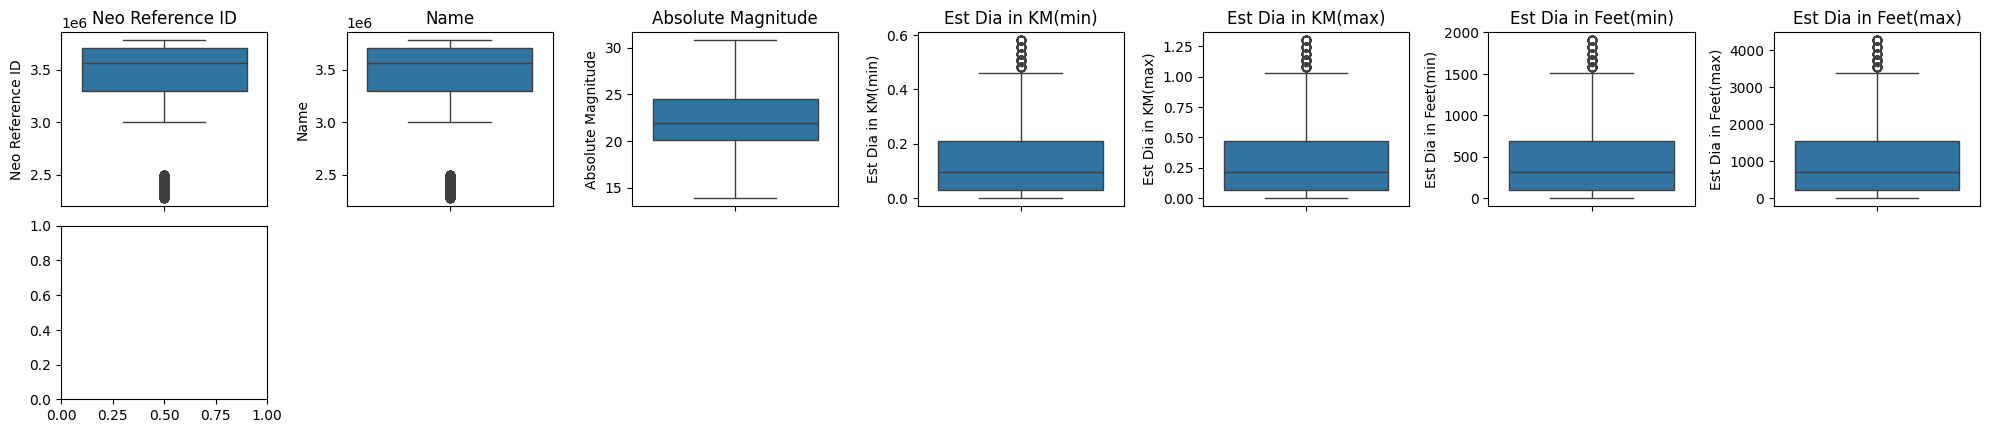

In [70]:

# Function to remove outliers using IQR
def remove_outliers(df, variable, whis=1.5):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - whis * IQR
    upper_bound = Q3 + whis * IQR

    df_no_outliers = df[(df[variable] >= lower_bound) & (df[variable] <= upper_bound)]

    return df_no_outliers

# Set the size of the figure
plt.figure(figsize=(20, 10))

# Number of rows and columns for subplots
num_columns = math.ceil(len(data_.columns)/5)
num_rows = 5

# Iterate through each column in the DataFrame
for i, variable in enumerate(data_.columns):
    plt.subplot(num_rows, num_columns, i + 1)
    
    # Remove outliers for each variable
    data_no_outliers = remove_outliers(data_, variable)
    
    # Use seaborn to create box plots after removing outliers
    sns.boxplot(y=data_no_outliers[variable])
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    plt.title(f"{variable}")
    plt.tight_layout()

# Adjust the space between subplots
plt.subplots_adjust()

# Show the plots
plt.show()


#Outlier Removal for SMOTE


In [ ]:
# Function to remove outliers using IQR
def remove_outliers(df, variable, whis=1.5):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - whis * IQR
    upper_bound = Q3 + whis * IQR

    df_no_outliers = df[(df[variable] >= lower_bound) & (df[variable] <= upper_bound)]

    return df_no_outliers

# Set the size of the figure
plt.figure(figsize=(20, 10))

# Number of rows and columns for subplots
num_columns = math.ceil(len(data_.columns)/5)
num_rows = 5

# Iterate through each column in the DataFrame
for i, variable in enumerate(data_.columns):
    plt.subplot(num_rows, num_columns, i + 1)
    
    # Remove outliers for each variable
    data_no_outliers = remove_outliers(data_, variable)
    
    # Use seaborn to create box plots after removing outliers
    sns.boxplot(y=data_no_outliers[variable])
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    plt.title(f"{variable}")
    plt.tight_layout()

# Adjust the space between subplots
plt.subplots_adjust()

# Show the plots
plt.show()

In [51]:
print(data_.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3692 entries, 0 to 3691
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            3692 non-null   float64
 1   Est Dia in KM(min)            3692 non-null   float64
 2   Est Dia in KM(max)            3692 non-null   float64
 3   Est Dia in Feet(min)          3692 non-null   float64
 4   Est Dia in Feet(max)          3692 non-null   float64
 5   Relative Velocity km per sec  3692 non-null   float64
 6   Miss Dist.(Astronomical)      3692 non-null   float64
 7   Miss Dist.(lunar)             3692 non-null   float64
 8   Miss Dist.(kilometers)        3692 non-null   float64
 9   Orbit ID                      3692 non-null   int64  
 10  Orbit Uncertainity            3692 non-null   int64  
 11  Minimum Orbit Intersection    3692 non-null   float64
 12  Jupiter Tisserand Invariant   3692 non-null   float64
 13  Epo

Est Dia in KM(min)  Est Dia in KM(max)  Est Dia in Feet(min)  Est Dia in Feet(max)  Relative Velocity km per sec  Miss Dist.(Astronomical)  Miss Dist.(lunar)  Miss Dist.(kilometers)  Orbit ID  Orbit Uncertainity  Minimum Orbit Intersection  Jupiter Tisserand Invariant  Epoch Osculation  Eccentricity  Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  Perihelion Distance  Perihelion Arg  Aphelion Dist  Perihelion Time  Mean Anomaly
0.001011            0.002260            3.315431              7.413530              18.135814                     0.000572                  0.222431           8.554018e+04            12        9                   0.000012                    3.203000                     2.454762e+06      0.682383      2.335502         5.283452     208.941651          1303.673637     0.741795             111.873833      3.929210       2.454720e+06     11.556837       1
0.256896            0.574436            842.833252            1884.632445           25.033273  

<Axes: xlabel='Hazardous', ylabel='count'>

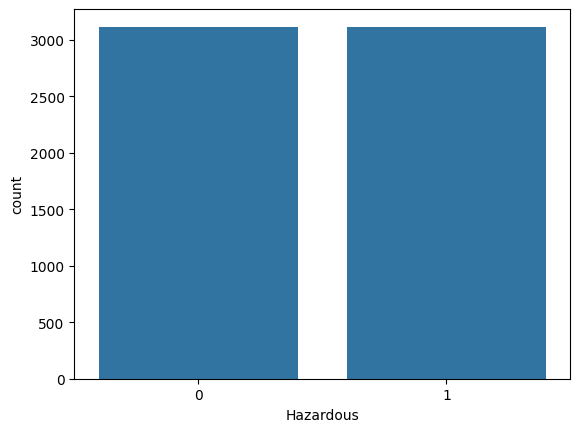

In [64]:
#SMOTE
from imblearn.over_sampling import SMOTE

x = data_.iloc[:, 1:24]
y = data_['Hazardous']

smote = SMOTE(sampling_strategy='minority')
x_s, y_s = smote.fit_resample(x, y)
print(x_s.value_counts())
print(y_s.value_counts())

sns.barplot(y_s.value_counts())

# # Create a count plot
# sns.countplot(y_s)

# # Set plot labels
# plt.xlabel('Hazardous')
# plt.ylabel('Count')

# # Show the plot
# plt.show()


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x_s, y_s, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)
from sklearn.linear_model import LogisticRegression
loki  = LogisticRegression()
loki.fit(X_train, y_train)

(4362, 23) (1870, 23)


LogisticRegression()

In [72]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
def get_metrics_score(model,flag=True):
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    # Recall = minimizes false negatives
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    # Precision = minimizes false positives
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1, test_f1))
        
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list

In [74]:
import numpy as np
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

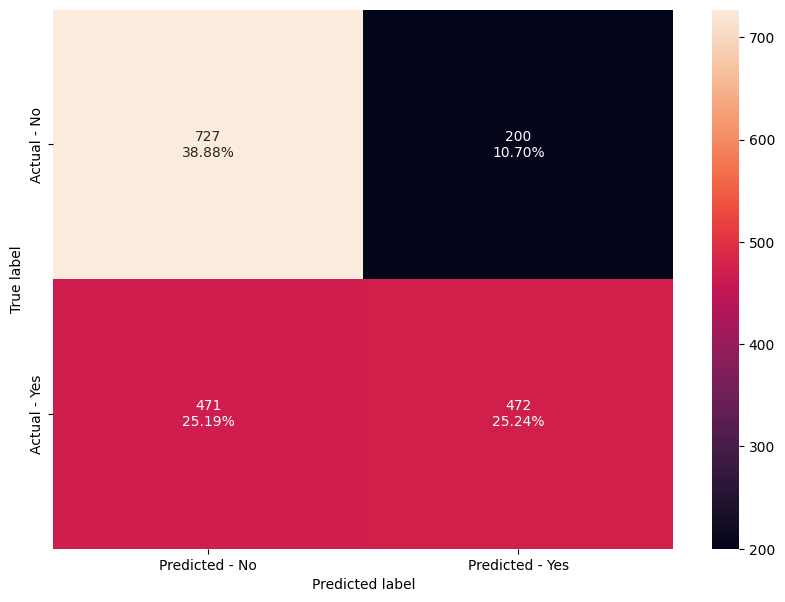

In [76]:
make_confusion_matrix(loki,y_test)

In [73]:
get_metrics_score(loki)

Accuracy on training set :  0.635259055479138
Accuracy on test set :  0.6411764705882353
Recall on training set :  0.5057524160147262
Recall on test set :  0.5005302226935313
Precision on training set :  0.6800742574257426
Precision on test set :  0.7023809523809523
F1-Score on training set :  0.5801002903140671
F1-Score on test set :  0.5845201238390093


[0.635259055479138,
 0.6411764705882353,
 0.5057524160147262,
 0.5005302226935313,
 0.6800742574257426,
 0.7023809523809523,
 0.5801002903140671,
 0.5845201238390093]

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='roc_auc')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
confusion_matrix_output = confusion_matrix(y_test, y_pred)

# Get predicted probabilities from the best model
y_prob_best_model = best_model.predict_proba(X_test)[:, 1]


/Users/vishal/anaconda3/envs/DM/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/vishal/anaconda3/envs/DM/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/vishal/anaconda3/envs/DM/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/vishal/anaconda3/envs/DM/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/vishal/anaconda3/envs/DM/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vishal/anaconda3/envs/DM/lib/python3.

Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


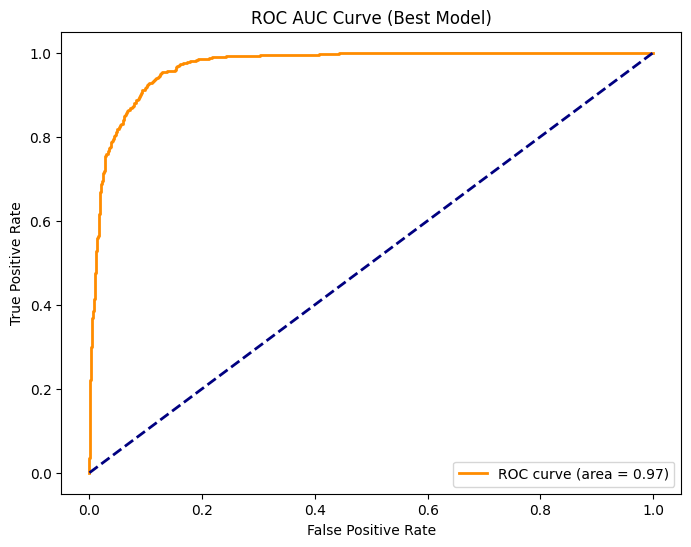


Best Model Accuracy: 0.9112



In [81]:
fpr_best_model, tpr_best_model, _ = roc_curve(y_test, y_prob_best_model)
auc_score_best_model = roc_auc_score(y_test, y_prob_best_model)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best_model, tpr_best_model, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score_best_model))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve (Best Model)')
plt.legend(loc="lower right")
plt.show()

print(f"\nBest Model Accuracy: {accuracy:.4f}\n")

In [80]:
# Calculate AUC score
print(f"AUC Score (Best Model): {auc_score_best_model:.4f}")
print("Classification Report (Best Model):")
print(classification_report_output)
print("\nConfusion Matrix (Best Model):")
print(confusion_matrix_output)

AUC Score (Best Model): 0.9693
Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       927
           1       0.90      0.93      0.91       943

    accuracy                           0.91      1870
   macro avg       0.91      0.91      0.91      1870
weighted avg       0.91      0.91      0.91      1870


Confusion Matrix (Best Model):
[[829  98]
 [ 68 875]]


In [82]:
make_confusion_matrix(y_prob_best_model,y_test)

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

Text(0.5, 47.7222222222222, 'Predicted label')

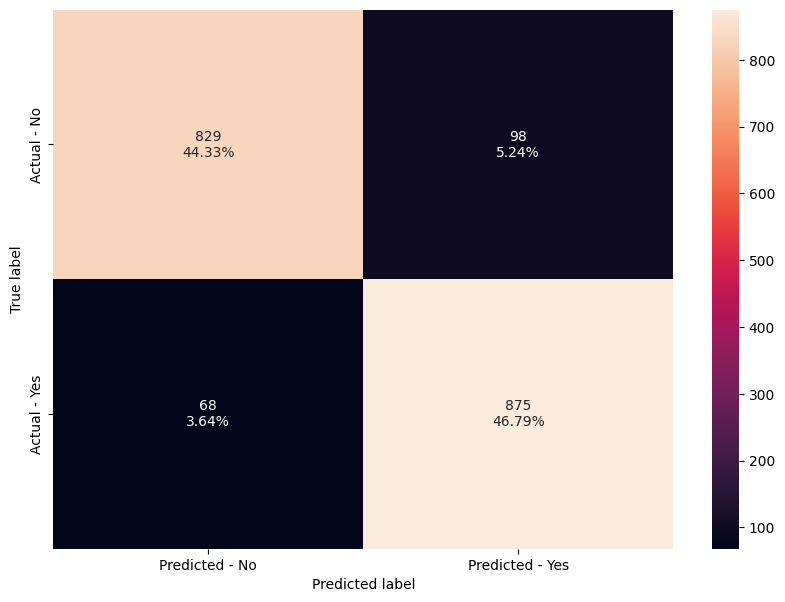

In [90]:
cm = confusion_matrix(y_test, y_pred,labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=labels,fmt='')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [87]:
get_metrics_score_LR(best_model,y_test)

ValueError: Classification metrics can't handle a mix of binary and continuous targets